# Project: Investigate a Dataset - [Medical Appointment No Shows](https://www.kaggle.com/datasets/joniarroba/noshowappointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
​
> The No-show Appointments dataset contains information about medical appointments in Brazil and whether patients showed up or not. The dataset is designed to help analyze factors that may influence a patient's likelihood of missing their scheduled appointment. Each row in the dataset represents a single medical appointment for a patient, along with demographic information, appointment details, and medical history. 
​
#### Column Names and Their Significance

**PatientId** (float) – Unique identifier for each patient

`AppointmentID` (int) – Unique identifier for each appointment

`Gender` (str) – Patient's gender (**F** for female, **M** for male)

`ScheduledDay` (str / datetime) – The date and time when the appointment was scheduled

`AppointmentDay` (str / datetime) – The date of the actual appointment

`Age` (int) – Age of the patient in years

`Neighbourhood` (str) – The location (neighbourhood) of the hospital/clinic where the appointment was scheduled.

`Scholarship` (int: 0 or 1) – Indicates whether the patient is enrolled in the Bolsa Família welfare program (**1** for yes, **0** for no).

`Hipertension` (int: 0 or 1) – Indicates whether the patient has hypertension (**1** for yes, **0** for no).

`Diabetes` (int: 0 or 1) – Indicates whether the patient has diabetes (**1** for yes, **0** for no).

`Alcoholism` (int: 0 or 1) – Indicates whether the patient has a history of alcoholism (**1** for yes, **0** for no).

`Handcap` (int: 0–4) – Disability level of the patient. **0** means no handicap; higher numbers indicate greater disability.

`SMS_received` (int: 0 or 1) – Indicates whether the patient received an SMS reminder for the appointment (**1** for yes, **0** for no).

`No-show` (str) – Target variable: **No** means the patient showed up; **Yes** means the patient did not attend.
​
### Question(s) for Analysis


>Is there a relationship between patient age and the likelihood of showing up for an appointment?
​


>  Do patients with certain medical conditions (hypertension, diabetes, alcoholism, or disabilities) have higher no-show rates compared to those without these conditions?
​


> At what day patients are most likely to miss their appointments?

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling




### General Properties


In [2]:
# First let's load the data and explore it
df = pd.read_csv("./Database_No_show_appointments.csv")
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [4]:
df.shape

(110527, 14)

**The dataset contains 110,527 rows and 14 columns.**

In [5]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

**There are no missing values in the dataset**

In [6]:
df.duplicated().sum()

0

**There are no duplicate records.**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


**Some data types required correction (e.g., object types that should be dates or categorical values)**


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

**The `No-show` column was standardized for easier handling, where `No` indicates the patient showed up and `Yes` indicates the patient did not show up.**

In [8]:
df.rename(columns={'No-show': 'No_show'}, inplace=True)

**The `ScheduledDay` column does not contribute relevant information and was therefore excluded.**

In [9]:
# let's drop ScheduledDay
df.drop(['ScheduledDay'],axis=1, inplace=True)
df.head()

,PatientId,AppointmentID,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


**The`AppointmentDay`column was converted from object type to datetime**

In [10]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 4   Age             110527 non-null  int64              
 5   Neighbourhood   110527 non-null  object             
 6   Scholarship     110527 non-null  int64              
 7   Hipertension    110527 non-null  int64              
 8   Diabetes        110527 non-null  int64              
 9   Alcoholism      110527 non-null  int64              
 10  Handcap         110527 non-null  int64              
 11  SMS_received    110527 non-null  int64              
 12  No_show         110527 non-null  object             
dtypes: datetime64[

**Some columns were downcasted to reduce memory usage.**

In [12]:
# first let us specify the colmuns 
label_int = ['AppointmentID','Age','Scholarship', 'Hipertension','Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']

label_obj = ['Gender','Neighbourhood','No_show']

#now let's loop around them to make them weight less

## looping around integers :

for c in label_int:
    df[c] = df[c].astype("int8")
    
## looping around objects(strings) :
for o in label_obj:
    df[o] = df[o].astype("category")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int8               
 2   Gender          110527 non-null  category           
 3   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 4   Age             110527 non-null  int8               
 5   Neighbourhood   110527 non-null  category           
 6   Scholarship     110527 non-null  int8               
 7   Hipertension    110527 non-null  int8               
 8   Diabetes        110527 non-null  int8               
 9   Alcoholism      110527 non-null  int8               
 10  Handcap         110527 non-null  int8               
 11  SMS_received    110527 non-null  int8               
 12  No_show         110527 non-null  category           
dtypes: category(3)

**After optimization, memory usage decreased from  `11.0+` MB to `2.8` MB**

<a id='eda'></a>
## Exploratory Data Analysis




###  Is there a relationship between patient age and the likelihood of showing up for an appointment?

**examine the differences between patients who showed up and those who did not**

In [14]:
df["No_show"].value_counts()

No     88208
Yes    22319
Name: No_show, dtype: int64

**we created A `histogram` it will allows us to see the distribution of ages for patients who showed up vs those who didn’t.By overlaying the two groups, we can visually compare patterns.**


Average age of no-show patients: 34.32
Average age of attending patients: 37.79


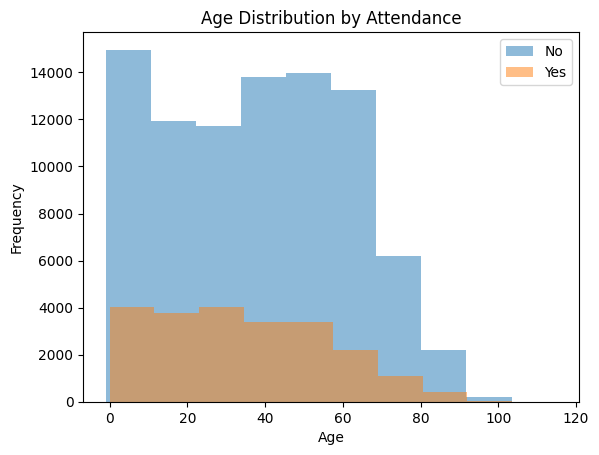

In [15]:
# Histogram:
ages_no_show = df[df["No_show"]=="Yes"]["Age"].to_numpy()
ages_show = df[df["No_show"]=="No"]["Age"].to_numpy()

mean_no_show = np.mean(ages_no_show)
mean_show = np.mean(ages_show)

print(f"Average age of no-show patients: {mean_no_show:.2f}")
print(f"Average age of attending patients: {mean_show:.2f}")

# Histogram: Age distribution by show vs no-show
df.groupby("No_show")["Age"].plot(kind="hist", alpha=0.5, legend=True)
plt.title("Age Distribution by Attendance")
plt.xlabel("Age")
plt.show()

**`Line Chart` Shows the trend of no-show rates across ages.Each point represents the proportion of patients of a given age who missed their appointment, which helps identify patterns or peaks in no-show likelihood as age increases.**

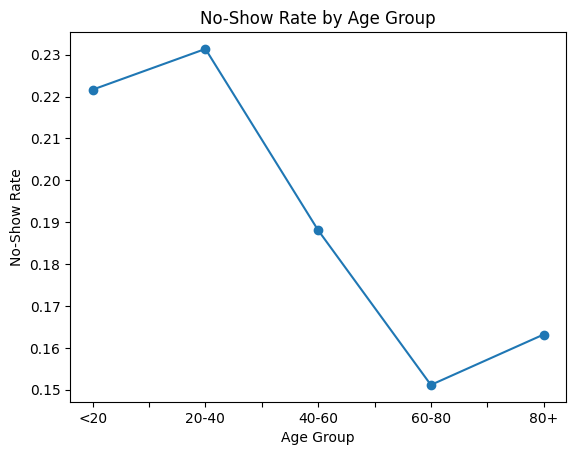

In [24]:
# Utility function to set plot title and axis labels
def add_title_and_labels(title, xlabel, ylabel=""):
    plt.title(title)
    plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
        
# Line plot: No-show rate by age groups
bins = [0, 20, 40, 60, 80, 100]
labels = ["<20", "20-40", "40-60", "60-80", "80+"]
df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)

rate_by_age = df.groupby("AgeGroup")["No_show"].value_counts(normalize=True).unstack()["Yes"]
rate_by_age.plot(kind="line", marker="o")
add_title_and_labels("No-Show Rate by Age Group", "Age Group", "No-Show Rate")
plt.show()

**The `histogram` and `line chart` collectively indicate that older patients are more frequently represented among no-shows, while younger patients are more likely to attend their scheduled appointments.**



### Do patients with certain medical conditions (hypertension, diabetes, alcoholism, or disabilities) have higher no-show rates compared to those without these conditions?

**We analyzed the relationship between patients’ medical conditions and their likelihood of missing appointments. First, we filtered the dataset to include only patients who did not show up (No_show == "Yes").
For Handcap, all values greater than 1 were treated as 1, representing the presence of a handicap.
A patient was considered “No Condition” only if they had 0 in all four conditions (Hipertension, Diabetes, Alcoholism, Handcap).**

In [17]:
# Copy dataframe to avoid modifying original
df_copy = df.copy()

# Fix handicap values: anything >= 1 → 1
df_copy["Handcap"] = df_copy["Handcap"].apply(lambda x: 1 if x >= 1 else 0)

# Filter missed appointments only
missed = df_copy[df_copy["No_show"] == "Yes"]

# Conditions
conditions = ["Hipertension", "Diabetes", "Alcoholism", "Handcap"]

# Initialize counters
condition_counts = {cond: 0 for cond in conditions}
condition_counts["No Condition"] = 0

# Loop through rows
for _, row in missed.iterrows():
    # Check if the person has ANY condition
    has_any = False
    for cond in conditions:
        if row[cond] == 1:
            condition_counts[cond] += 1
            has_any = True
    # If no condition at all
    if not has_any:
        condition_counts["No Condition"] += 1

**The `bar chart` shows the raw counts of patients who missed appointments for each condition (No Condition vs Has Condition), making it easy to compare categories.**

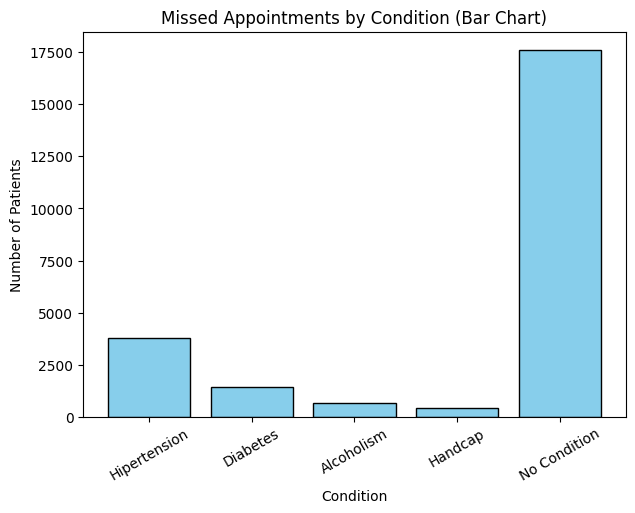

In [18]:
# Bar chart 
plt.figure(figsize=(7,5))
plt.bar(condition_counts.keys(), condition_counts.values(), color="skyblue", edgecolor="black")
add_title_and_labels("Missed Appointments by Condition (Bar Chart)", "Condition", "Number of Patients")
plt.xticks(rotation=30)
plt.show()

**The `pie chart` visualizes the proportion of missed appointments across conditions, giving a clear sense of distribution.**

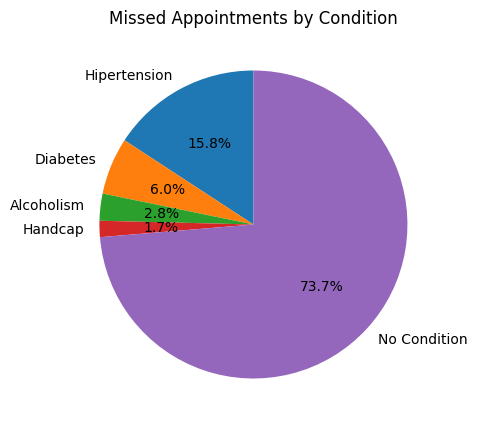

In [19]:
# Plot pie chart
plt.figure(figsize=(5,5))
plt.pie(
    condition_counts.values(),
    labels=condition_counts.keys(),
    autopct='%1.1f%%',
    startangle=90
)
add_title_and_labels("Missed Appointments by Condition", "", "")
plt.show()

**The majority of patients who missed their appointments had no underlying medical conditions. Among those with conditions, `Hipertension` accounted for the largest share, followed by `Diabetes`, `Alcoholism`, and `Handcap`. The pie chart quantifies this distribution, showing 73.7% without conditions, 15.8% with `Hipertension`, 6% with `Diabetes`, 2.8% with `Alcoholism`, and 1.7% with `Handcap`.**

### At what day patients are most likely to miss their appointments?

In [20]:
# Filter missed appointments using query
missed = df.query('No_show == "Yes"')

# Extract day directly from AppointmentDay
days = missed['AppointmentDay'].dt.day_name()

**The `bar chart`shows the number of missed appointments per weekday, which makes it easy to compare discrete counts between days.**

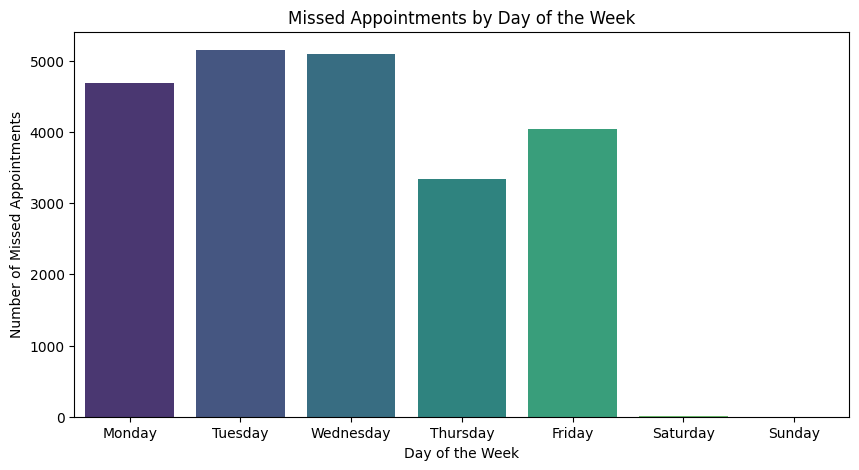

In [21]:
# Bar chart: number of no-shows per day
plt.figure(figsize=(10,5))
sns.countplot(
    x=days, 
    order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], 
    palette='viridis'
)
add_title_and_labels("Missed Appointments by Day of the Week", "Day of the Week", "Number of Missed Appointments")
plt.show()


**The `line chart` highlights the trend across the week, showing whether missed appointments increase or decrease over consecutive days.**

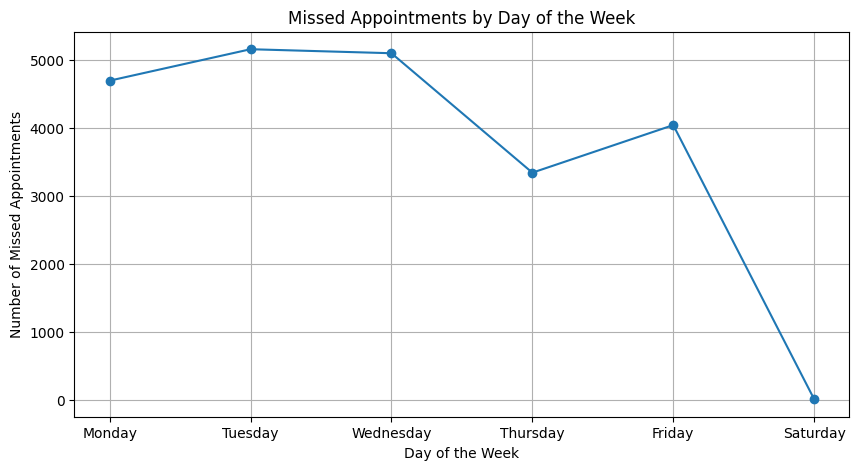

In [22]:
# Line chart
day_counts = days.value_counts().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.figure(figsize=(10,5))
plt.plot(day_counts.index, day_counts.values, marker='o')
add_title_and_labels("Missed Appointments by Day of the Week", "Day of the Week", "Number of Missed Appointments")
plt.grid(True)
plt.show()

**Analysis of the appointment data reveals a clear pattern in patient no-shows throughout the week. Both the bar chart and the line chart consistently indicate that Tuesday experiences the highest number of missed appointments, suggesting it is the day with the greatest likelihood of patient absenteeism. This is followed by Wednesday and Monday, which show moderately high no-show counts. In contrast, Friday and Thursday exhibit comparatively lower missed appointment rates. These trends suggest that patient attendance fluctuates across the week, with midweek appointments being more prone to no-shows, which may have implications for scheduling and resource allocation in the clinic.**

<a id='conclusions'></a>
## Conclusions

The analysis explored patterns in patient attendance with respect to age, medical conditions, and appointment days.

>Age and Attendance:
The histogram indicates that older patients are more frequently represented among those who missed appointments, while younger patients tend to attend more reliably. This suggests that age may be associated with attendance behavior, though no statistical tests were performed, so no causal inference can be made.

>Medical Conditions and No-Shows:
The majority of patients who missed appointments had no underlying medical conditions. Among those with conditions, hypertension was most common, followed by diabetes, alcoholism, and handicap. Specifically, the pie chart shows 73.7% of missed appointments occurred among patients with no conditions, 15.8% with hypertension, 6% with diabetes, 2.8% with alcoholism, and 1.7% with handicap. This indicates that having a medical condition does not necessarily increase the likelihood of missing appointments.

>Appointment Day Trends:
Analysis of missed appointments by day of the week revealed that Tuesdays had the highest number of no-shows, followed by Wednesdays and Mondays. Conversely, Fridays and Thursdays had the lowest counts. This suggests that midweek appointments may be more prone to absenteeism, which could inform clinic scheduling and resource allocation.

**Limitations:**

>The analysis is descriptive and does not include formal statistical testing; therefore, observed patterns indicate associations rather than causation.

>Certain conditions, like “Handcap,” required data transformation (values >1 treated as 1), which simplifies the underlying information and may slightly affect the accuracy of counts.

**Future Research:**

Future studies could investigate the effect of available features such as Neighbourhood and SMS reminders, as well as additional patient demographics or behavioral factors, to better understand drivers of missed appointments. Statistical modeling could also be applied to quantify the strength of associations and predict no-show risk more accurately.

## Submitting your Project 



In [23]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 531694 bytes to Investigate_a_Dataset.html
